<h1>Correlation heatmap for various parameters</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('nation_level_daily.csv')

In [3]:
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [4]:
corrmat = data.loc[ : , ['Daily Confirmed', 'Daily Recovered', 'Daily Deceased']].corr()

In [5]:
corrmat

,Daily Confirmed,Daily Recovered,Daily Deceased
Daily Confirmed,1.000000,0.988562,0.829483
Daily Recovered,0.988562,1.000000,0.817422
Daily Deceased,0.829483,0.817422,1.000000


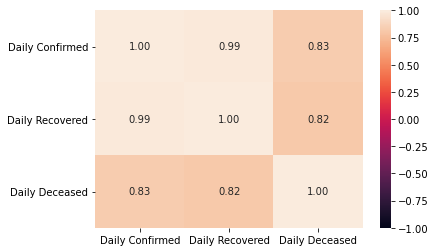

In [6]:
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=False, annot=True, fmt='.2f', annot_kws={'size': 10})

In [7]:
data1 = pd.read_csv('state wise data.csv')

In [8]:
data1.head(6)

,Unnamed: 0,Confirmed,Active,Recovered,Deceased,Population
0,Maharashtra,180298,79091,93154,8053,123144223
1,Tamil Nadu,94049,39859,52926,1264,77841267
2,Delhi,89802,27007,59992,2803,18710922
3,Gujarat,33232,7335,24030,1867,63872399
4,Uttar Pradesh,24056,6709,16629,718,237882725
5,West Bengal,19170,5959,12528,683,99609303


In [9]:
top_6 = data1.loc[0 : 5, 'Unnamed: 0']

In [10]:
top_6

0      Maharashtra
1       Tamil Nadu
2            Delhi
3          Gujarat
4    Uttar Pradesh
5      West Bengal
Name: Unnamed: 0, dtype: object

In [11]:
top_6 = np.reshape(np.asarray(top_6), (2, 3))

In [12]:
top_6

array([['Maharashtra', 'Tamil Nadu', 'Delhi'],
       ['Gujarat', 'Uttar Pradesh', 'West Bengal']], dtype=object)

In [13]:
data1 = pd.read_csv('state_level_daily.csv')

In [14]:
data1['Date'] =pd.to_datetime(data1['Date'])

In [15]:
data1.head()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
0,0,2020-04-01,AN,0,0,0,Andaman and Nicobar Islands
1,1,2020-04-01,AP,67,0,1,Andhra Pradesh
2,2,2020-04-01,AR,0,0,0,Arunachal Pradesh
3,3,2020-04-01,AS,15,0,0,Assam
4,4,2020-04-01,BR,3,0,0,Bihar


In [16]:
data1['State_Name'].unique() 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Daman and Diu', 'Delhi',
       'Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Gujarat',
       'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Jammu and Kashmir',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Maharashtra',
       'Meghalaya', 'Manipur', 'Madhya Pradesh', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Puducherry', 'Rajasthan', 'Sikkim',
       'Telangana', 'Tamil Nadu', 'Tripura', 'Total', 'State Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

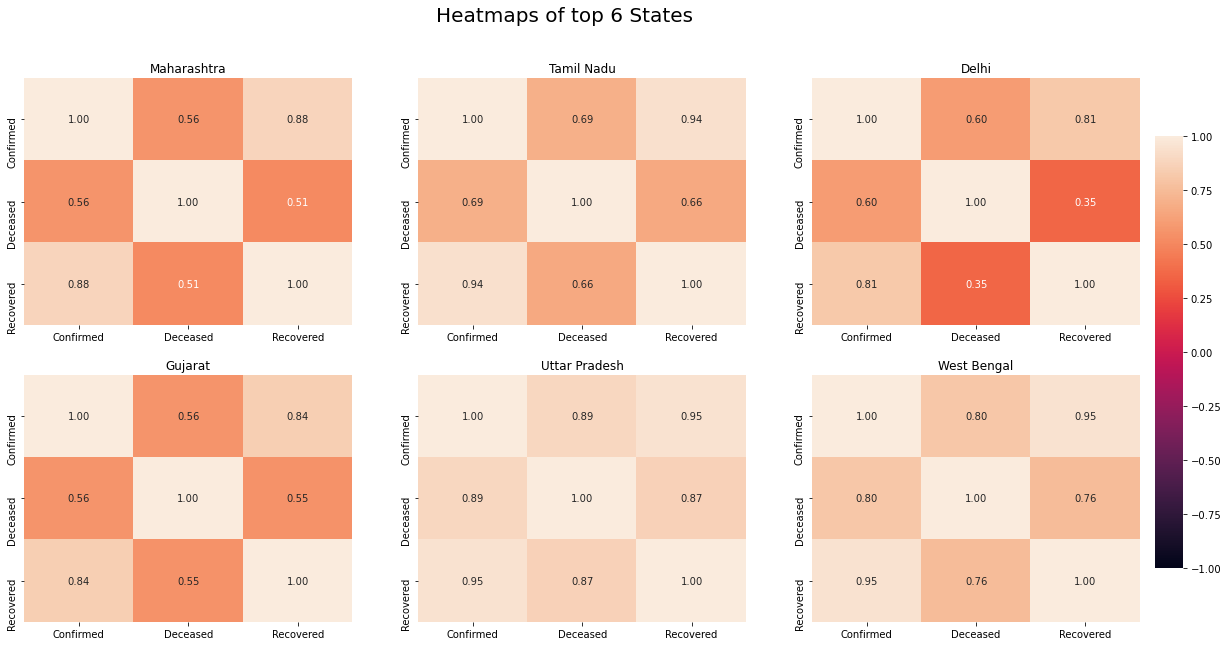

In [17]:
fig, xy = plt.subplots(2, 3, figsize = (20, 10))
cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i in range(2):
    for j in range(3):
        d = data1.loc[data1['State_Name'] == top_6[i][j], :].sort_values('Date')
        sns.heatmap(d.loc[ : , 'Confirmed' : 'Recovered'].corr(), vmin = -1, vmax = 1, square=False, annot=True, fmt='.2f', annot_kws={'size': 10}, ax = xy[i][j], cbar = (i == 0 and j == 0), cbar_ax = None if (i != 0 and j != 0) else cbar_ax)
        xy[i][j].set_title(top_6[i][j])
a = fig.suptitle('Heatmaps of top 6 States', fontsize = 20)